# 🐱🐶 Cats vs Dogs Image Classification using CNN

This project aims to build a Convolutional Neural Network (CNN) that can classify images of cats and dogs. We use a labeled dataset containing thousands of cat and dog images, and apply image preprocessing, data augmentation, and CNN-based modeling to achieve accurate binary classification.

Key tasks include:
- Loading and preprocessing image data
- Applying data augmentation to reduce overfitting
- Building and training a CNN from scratch
- Evaluating model performance with accuracy and visual metrics


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

# Paths
data_dir = r"D:\Real ML\Level 4\Cats and Dogs\archive\training_set\training_set"
img_size = (150, 150)
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,          # 30% for val + test
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Training set (70% of data)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=42
)

# Validation set (20% of data)
val_generator = val_test_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 5604 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.


Building Model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout added to reduce overfitting
    layers.Dense(1, activation='sigmoid')
])


In [3]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/20
176/176 [==============================] - 121s 682ms/step - loss: 0.7546 - accuracy: 0.5195 - val_loss: 0.6898 - val_accuracy: 0.5560
Epoch 2/20
176/176 [==============================] - 118s 669ms/step - loss: 0.6874 - accuracy: 0.5628 - val_loss: 0.6619 - val_accuracy: 0.5964
Epoch 3/20
176/176 [==============================] - 108s 615ms/step - loss: 0.6711 - accuracy: 0.5935 - val_loss: 0.6513 - val_accuracy: 0.6160
Epoch 4/20
176/176 [==============================] - 110s 622ms/step - loss: 0.6481 - accuracy: 0.6272 - val_loss: 0.6366 - val_accuracy: 0.6472
Epoch 5/20
176/176 [==============================] - 103s 583ms/step - loss: 0.6336 - accuracy: 0.6420 - val_loss: 0.6255 - val_accuracy: 0.6681
Epoch 6/20
176/176 [==============================] - 105s 597ms/step - loss: 0.6166 - accuracy: 0.6656 - val_loss: 0.5766 - val_accuracy: 0.7101
Epoch 7/20
176/176 [==============================] - 104s 588ms/step - loss: 0.5883 - accuracy: 0.6908 - val_loss: 0.5845 -

In [5]:
model.save("cats_vs_dogs_cnn.h5")
print("✅ Model saved as cats_vs_dogs_cnn.h5")

✅ Model saved as cats_vs_dogs_cnn.h5


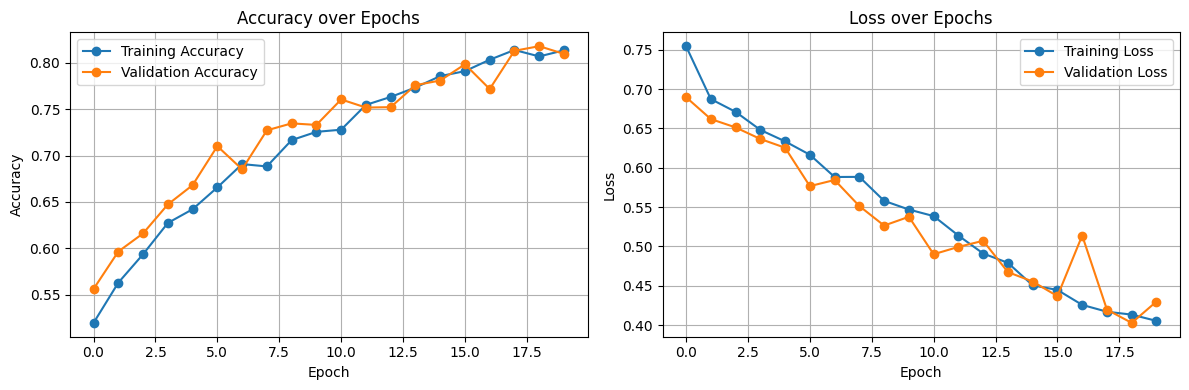

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 31ms/step


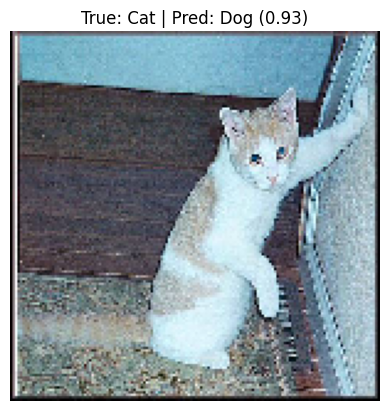

1/1 [==============================] - 0s 28ms/step


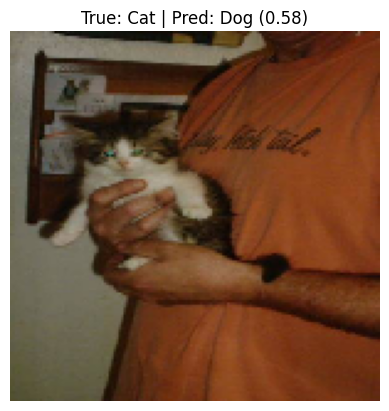

1/1 [==============================] - 0s 16ms/step


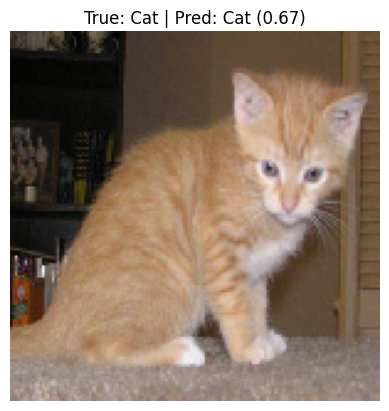

1/1 [==============================] - 0s 25ms/step


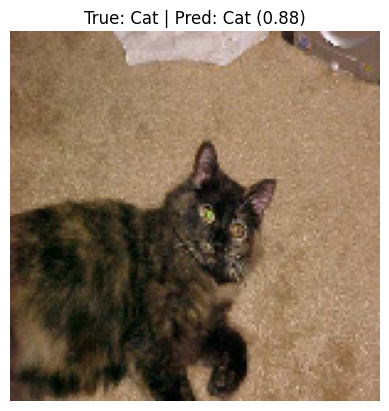

1/1 [==============================] - 0s 12ms/step


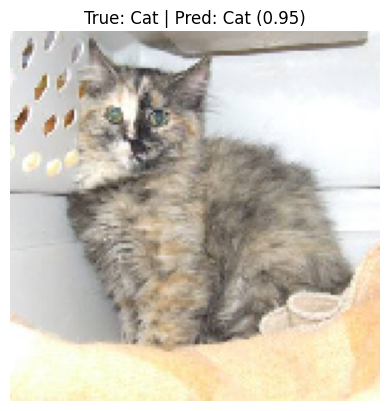

1/1 [==============================] - 0s 9ms/step


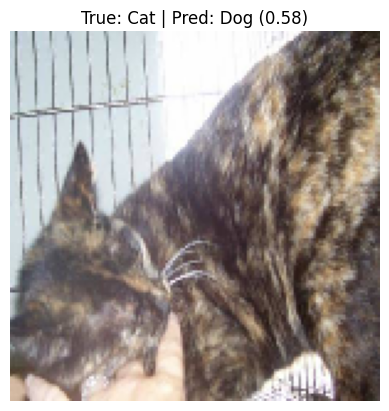

1/1 [==============================] - 0s 16ms/step


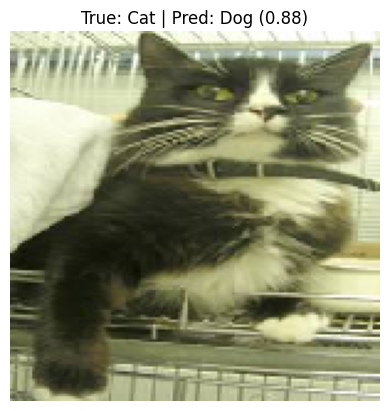

1/1 [==============================] - 0s 25ms/step


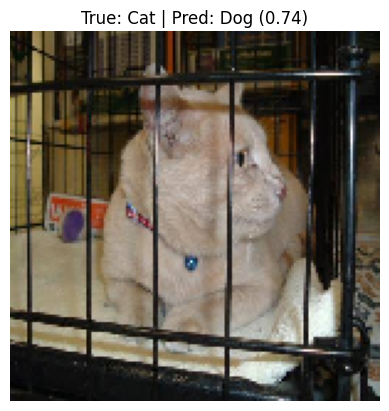

1/1 [==============================] - 0s 25ms/step


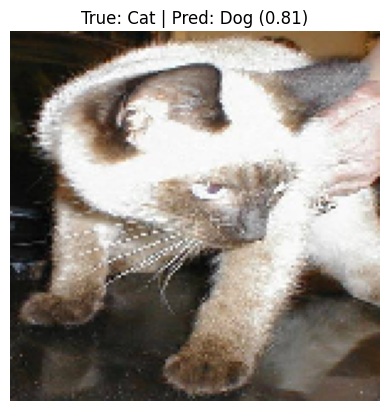

1/1 [==============================] - 0s 16ms/step


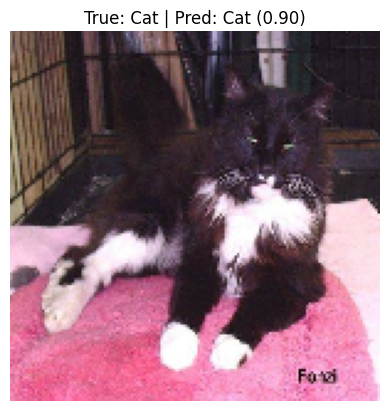

1/1 [==============================] - 0s 25ms/step


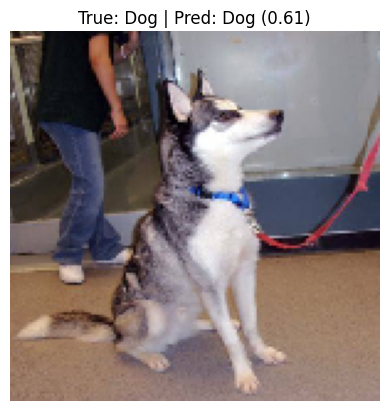

1/1 [==============================] - 0s 30ms/step


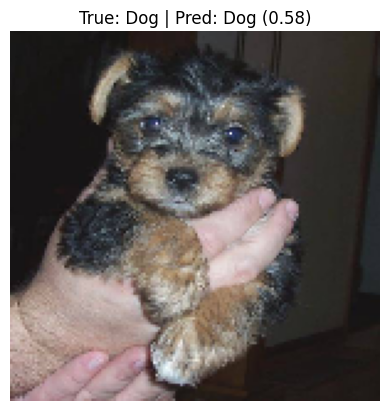

1/1 [==============================] - 0s 25ms/step


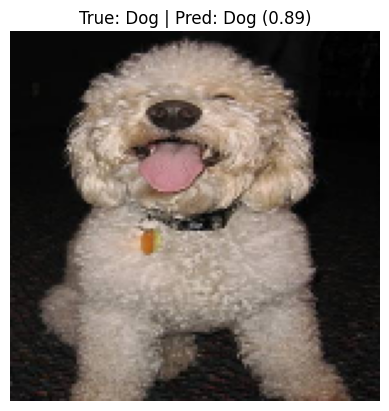

1/1 [==============================] - 0s 26ms/step


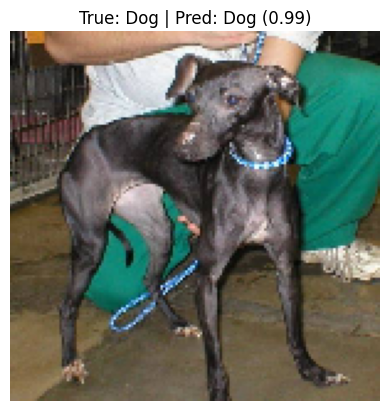

1/1 [==============================] - 0s 26ms/step


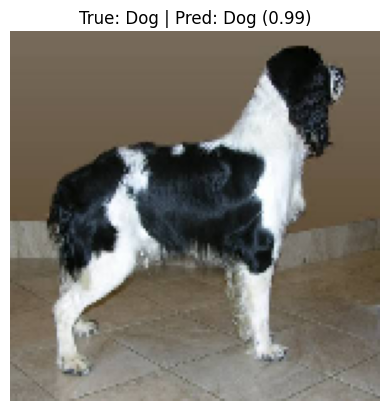

1/1 [==============================] - 0s 25ms/step


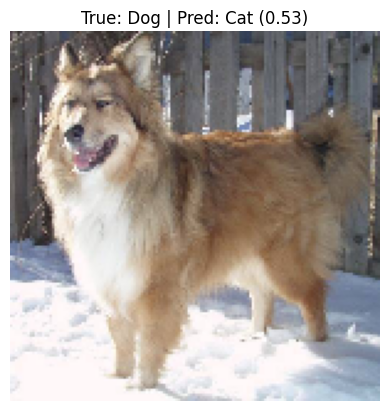

1/1 [==============================] - 0s 25ms/step


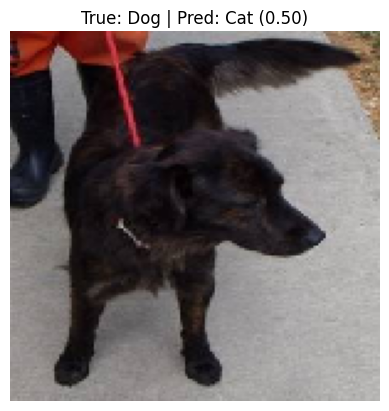

1/1 [==============================] - 0s 26ms/step


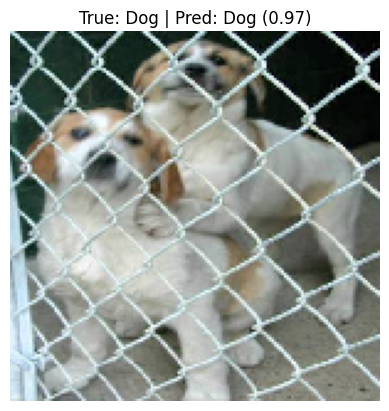

1/1 [==============================] - 0s 26ms/step


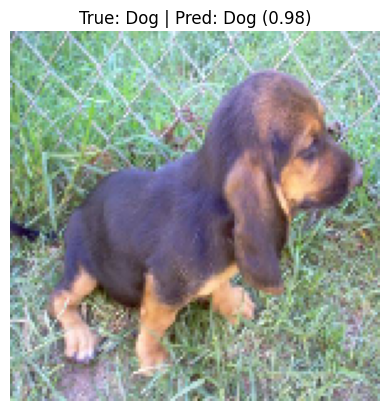

1/1 [==============================] - 0s 26ms/step


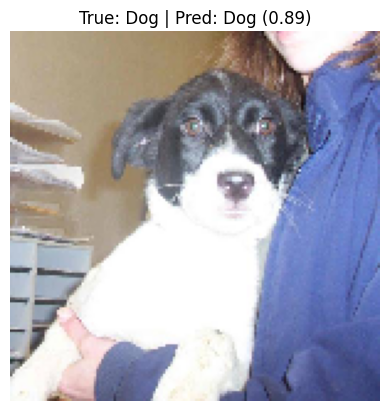

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Paths
test_dir = r"D:\Real ML\Level 4\Cats and Dogs\archive\test_set\test_set"
categories = ['cats', 'dogs']

# Process a few images from each category
for category in categories:
    category_path = os.path.join(test_dir, category)
    image_files = os.listdir(category_path)[:10]  # Load first 5 images per category

    for img_name in image_files:
        img_path = os.path.join(category_path, img_name)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_label = 'Dog' if prediction > 0.5 else 'Cat'
        confidence = prediction if prediction > 0.5 else 1 - prediction

        # Plot
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {category[:-1].capitalize()} | Pred: {predicted_label} ({confidence:.2f})")
        plt.show()


In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    r"D:\Real ML\Level 4\Cats and Dogs\archive\test_set\test_set",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


Found 2023 images belonging to 2 classes.
64/64 [==============================] - 18s 287ms/step - loss: 0.4342 - accuracy: 0.8131
Test Accuracy: 0.81
